In [1]:
import basic
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx
import basic
import flopy


C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_8\lib\site-packages\geopandas\_compat.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PANDAS_GE_10 = str(pd.__version__) >= LooseVersion("1.0.0")
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_8\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_8\lib\site-packages\geopandas\_compat.py:19: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PANDAS_GE_11 = str(pd.__version__) >= LooseVersion("1.1.0")
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_8\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\arich\AppData\Local\m

In [24]:
ml = basic.load_model(path = 'C:\modeling\MirabelWohler\data\Russian River\MODFLOW')

<>:1: DeprecationWarning: invalid escape sequence '\m'
<>:1: DeprecationWarning: invalid escape sequence '\m'
C:\Users\arich\AppData\Local\Temp\1\ipykernel_1568\1710605783.py:1: DeprecationWarning: invalid escape sequence '\m'
  ml = basic.load_model(path = 'C:\modeling\MirabelWohler\data\Russian River\MODFLOW')


C:\modeling\MirabelWohler\data\Russian River\MODFLOW


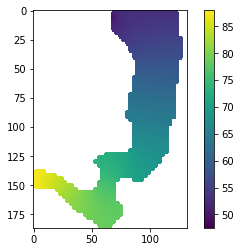

In [16]:
thick = ml.dis.top.array-ml.dis.botm.array[0]

ib = ml.bas6.ibound.array[0]

thick[ib==0] = np.nan

plt.imshow(thick)
plt.colorbar()

In [17]:
ml.bcf6.hy.array.shape

(3, 187, 132)

In [25]:
mnew = basic.load_model()

RR_2022


In [26]:
ml.modelgrid = mnew.modelgrid

<Figure size 432x288 with 0 Axes>

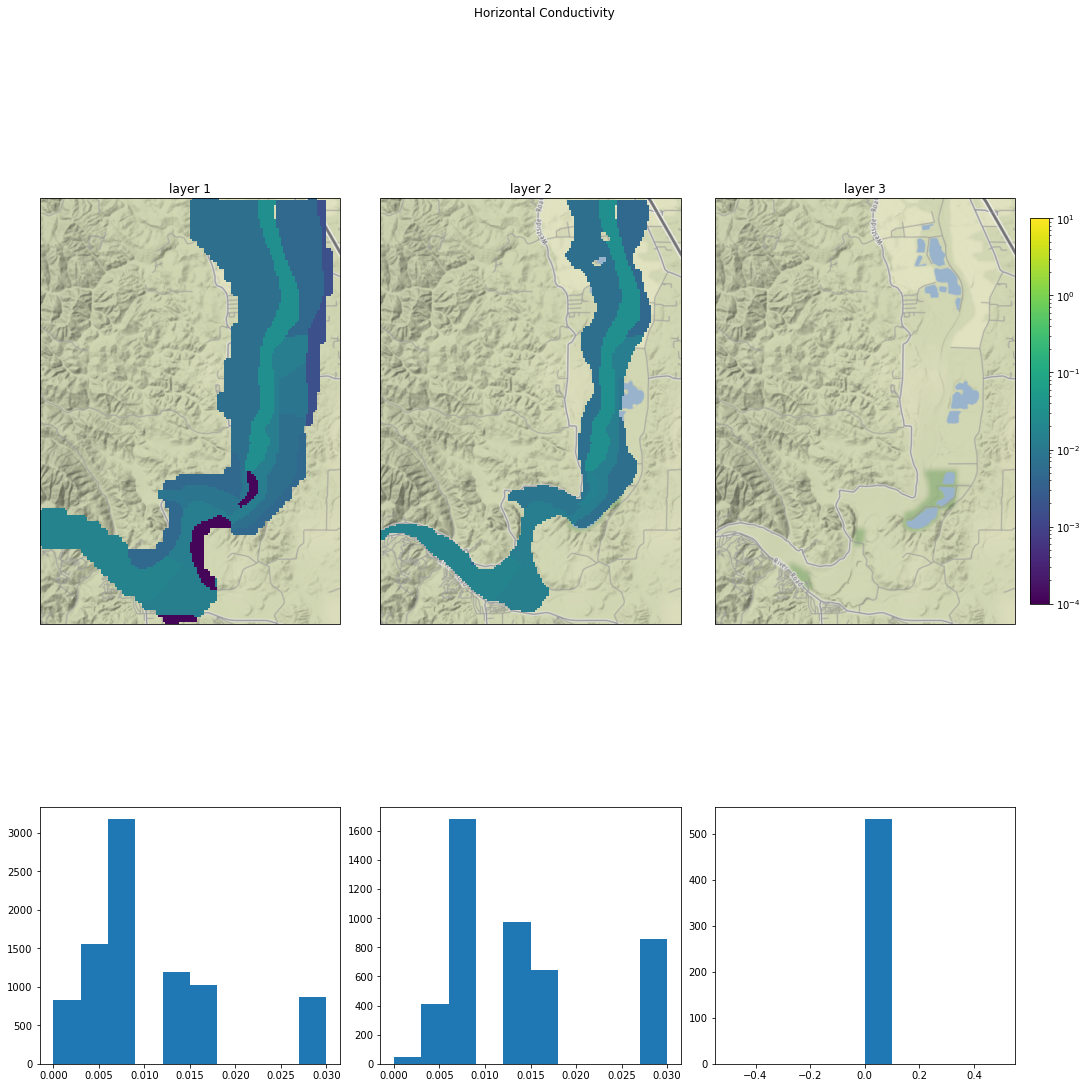

In [27]:
fig = basic.plot_aquifer_prop(ml = ml, array = ml.bcf6.hy.array)

In [31]:
np.unique(ml.bcf6.vcont.array)

array([0.001], dtype=float32)

IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 432x288 with 0 Axes>

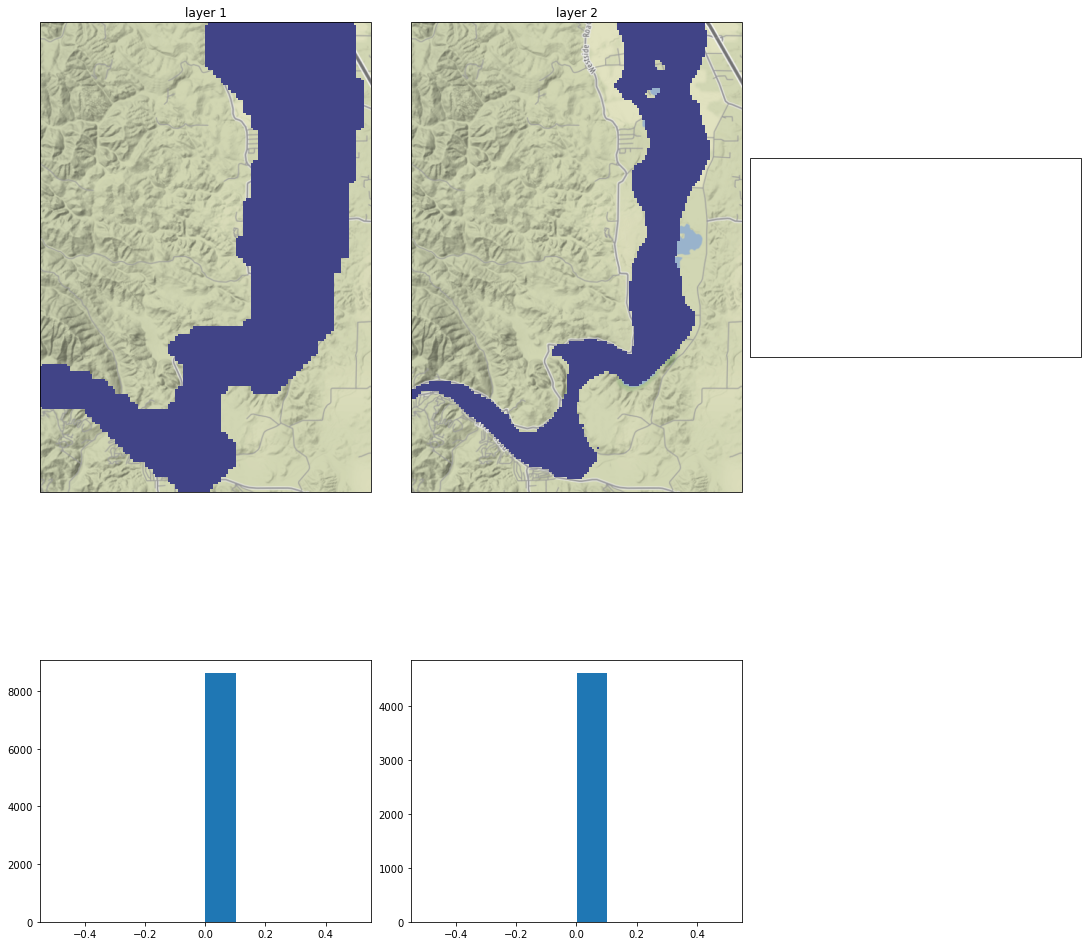

In [28]:
fig = basic.plot_aquifer_prop(ml = ml, array = ml.bcf6.vcont.array, title = 'Vcont')

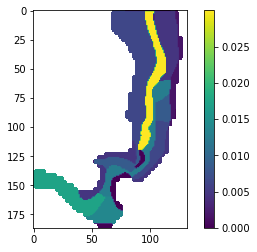

In [25]:
thick = ml.dis.top.array-ml.dis.botm.array[0]

ib = ml.bas6.ibound.array[0]
hk = ml.bcf6.hy.array[0]
hk[ib==0] = np.nan

plt.imshow(hk)
plt.colorbar()

In [22]:
ml.bcf6.laycon.array

array([1, 3, 0])

In [37]:
mnew.upw


    Upstream weighting package class


    Parameters
    ----------
    model : model object
        The model object (of type :class:`flopy.modflow.mf.Modflow`) to which
        this package will be added.
    ipakcb : int
        A flag that is used to determine if cell-by-cell budget data should be
        saved. If ipakcb is non-zero cell-by-cell budget data will be saved.
        (default is 0).
    hdry : float
        Is the head that is assigned to cells that are converted to dry during
        a simulation. Although this value plays no role in the model
        calculations, it is useful as an indicator when looking at the
        resulting heads that are output from the model. HDRY is thus similar
        to HNOFLO in the Basic Package, which is the value assigned to cells
        that are no-flow cells at the start of a model simulation. (default
        is -1.e30).
    iphdry : int
        iphdry is a flag that indicates whether groundwater head will be set
        to hdr

In [39]:
mnew.upw.laytyp.array 

array([0, 0, 0])

In [54]:
hk = ml.bcf6.hy.array[0]

In [55]:
np.savetxt('RR_2022/hklay1_thck.txt',hk, fmt = '%.15f', delimiter = ',')
np.savetxt('RR_2022/hklay2_thck.txt',hk, fmt = '%.15f', delimiter = ',')
np.savetxt('RR_2022/hklay3_thck.txt',hk, fmt = '%.15f', delimiter = ',')

In [36]:
# np.savetxt('RR_2022/vklay1_thck.txt',vk, fmt = '%.15f', delimiter = ',')

In [56]:
mnew

MODFLOW 3 layer(s) 187 row(s) 132 column(s) 109 stress period(s)

In [52]:
ml.dis.botm.array.shape

(3, 187, 132)

[ 35.399998  35.4       35.5      ... 544.2      588.              nan]
[29.999998 30.       30.000002       nan]
[59.999996 60.       60.000004       nan]


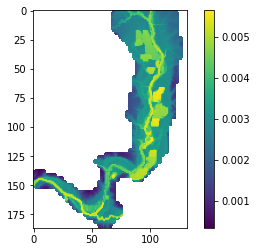

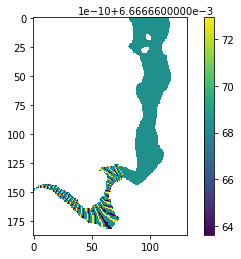

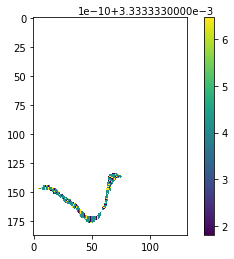

In [64]:
for lay in range(3):
    if lay ==0:
        thick = mnew.dis.top.array-mnew.dis.botm.array[0]
    else:
        thick = mnew.dis.botm.array[lay-1]-mnew.dis.botm.array[lay]

    ib = ml.bas6.ibound.array[lay]

    thick[ib==0] = np.nan
    ss = 0.2/thick
    print(np.unique(thick).reshape(-1))
    np.savetxt(f'RR_2022/sslay{lay+1}_thck.txt',ss, fmt = '%.15f', delimiter = ',')
    plt.figure()
    plt.imshow(ss)
    plt.colorbar()

In [62]:
np.unique(thick).reshape(-1)

array([59.999996, 60.      , 60.000004,       nan], dtype=float32)

(array([0., 1., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([59.999996, 59.999996, 59.999996, 60.      , 60.      , 60.      ,
        60.      , 60.      , 60.000004, 60.000004, 60.000004],
       dtype=float32),
 <BarContainer object of 10 artists>)

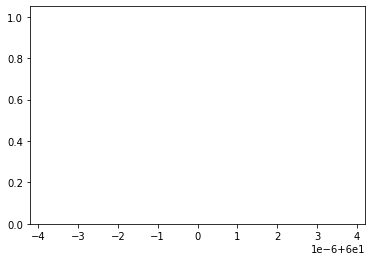

In [61]:
plt.hist(np.unique(thick).reshape(-1))